In [1]:
pip install neupy

     |████████████████████████████████| 235kB 13.7MB/s 
     |████████████████████████████████| 92.7MB 47kB/s 
     |████████████████████████████████| 368kB 33.6MB/s 
     |████████████████████████████████| 3.2MB 45.4MB/s 
     |████████████████████████████████| 51kB 7.9MB/s 
  Found existing installation: progressbar2 3.38.0
    Uninstalling progressbar2-3.38.0:
      Successfully uninstalled progressbar2-3.38.0
  Found existing installation: tensorflow-estimator 2.4.0
    Uninstalling tensorflow-estimator-2.4.0:
      Successfully uninstalled tensorflow-estimator-2.4.0
  Found existing installation: tensorboard 2.4.1
    Uninstalling tensorboard-2.4.1:
      Successfully uninstalled tensorboard-2.4.1
  Found existing installation: tensorflow 2.4.1
    Uninstalling tensorflow-2.4.1:
      Successfully uninstalled tensorflow-2.4.1
  Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
lokasi = "/content/drive/My Drive/_Skripsi/Laporan TA/kursdatav2.xlsx"

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = pd.read_excel(lokasi)
df.head()

,Minggu ke-,Tanggal,Suku Bunga Acuan,Inflasi,Kurs Jual,Kurs Beli
0,1,2017-04-02,0.0475,0.0417,1947.39,1927.51
1,2,2017-04-09,0.0475,0.0417,1936.35,1916.91
2,3,2017-04-16,0.0475,0.0417,1942.28,1922.68
3,4,2017-04-23,0.0475,0.0417,1938.98,1919.54
4,5,2017-04-30,0.0475,0.0417,1941.79,1922.07


In [6]:
df = df.drop('Minggu ke-', axis = 1)
df = df.drop('Tanggal', axis = 1)

df.head()

,Suku Bunga Acuan,Inflasi,Kurs Jual,Kurs Beli
0,0.0475,0.0417,1947.39,1927.51
1,0.0475,0.0417,1936.35,1916.91
2,0.0475,0.0417,1942.28,1922.68
3,0.0475,0.0417,1938.98,1919.54
4,0.0475,0.0417,1941.79,1922.07


In [7]:
df.describe()

,Suku Bunga Acuan,Inflasi,Kurs Jual,Kurs Beli
count,191.000000,191.000000,191.000000,191.000000
mean,0.049346,0.030114,2090.804948,2070.321626
std,0.006946,0.007304,85.274094,84.042427
min,0.037500,0.013200,1936.350000,1916.910000
25%,0.042500,0.027200,2015.493000,1995.823000
50%,0.047500,0.031800,2094.010000,2072.823333
75%,0.055000,0.034000,2163.365000,2141.180000
max,0.060000,0.043700,2329.238000,2305.542000


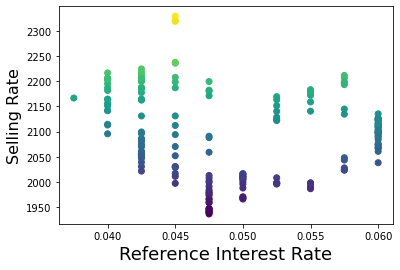

In [8]:
import matplotlib.pyplot as plt

sba = df['Suku Bunga Acuan']
i = df['Inflasi']
kj = df['Kurs Jual']
kb = df['Kurs Beli']

plt.scatter(sba, kj, c=kj)
# plt.scatter(df.iloc[:, 0:8], df.iloc[:, 0:8], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('Reference Interest Rate', fontsize=18)
plt.ylabel('Selling Rate', fontsize=16)
#
plt.show()

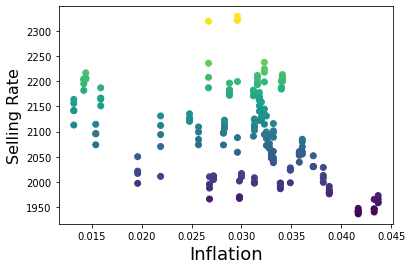

In [9]:
import matplotlib.pyplot as plt

sba = df['Suku Bunga Acuan']
i = df['Inflasi']
kj = df['Kurs Jual']
kb = df['Kurs Beli']

plt.scatter(i, kj, c=kj)
# plt.scatter(df.iloc[:, 0:8], df.iloc[:, 0:8], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('Inflation', fontsize=18)
plt.ylabel('Selling Rate', fontsize=16)
#
plt.show()

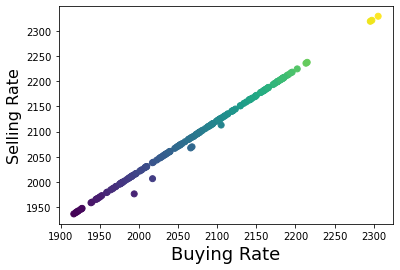

In [10]:
import matplotlib.pyplot as plt

sba = df['Suku Bunga Acuan']
i = df['Inflasi']
kj = df['Kurs Jual']
kb = df['Kurs Beli']

plt.scatter(kb, kj, c=kj)
# plt.scatter(df.iloc[:, 0:8], df.iloc[:, 0:8], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('Buying Rate', fontsize=18)
plt.ylabel('Selling Rate', fontsize=16)
#
plt.show()

In [11]:
X = df[['Suku Bunga Acuan','Inflasi', 'Kurs Beli']].values
y = df[['Kurs Jual']].values
# print(X)

In [12]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

X_train, X_test, y_train, y_test = train_test_split(preprocessing.minmax_scale(X), y, test_size = 0.2, random_state = 0)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [13]:
from neupy import algorithms

regression = algorithms.GRNN(std=0.1, verbose = True)
regression.fit(X_train, y_train)
regression

/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 


Main information

[ALGORITHM] GRNN

[OPTION] std = 0.1
[OPTION] verbose = True



GRNN(verbose=True, std=0.1)

In [14]:
y_predicted = regression.predict(X_test)
y_predicted

array([[2103.0859774 ],
       [2177.01151154],
       [2105.42285735],
       [2100.38540609],
       [2030.49962604],
       [2137.82028929],
       [1992.66611491],
       [1997.6020652 ],
       [2001.2311223 ],
       [1953.88315786],
       [1952.80610206],
       [2072.86952568],
       [2323.68702729],
       [2033.95601585],
       [2094.88652402],
       [2045.63428134],
       [2067.82594824],
       [2150.733226  ],
       [2000.62776822],
       [2000.76822416],
       [2199.13005394],
       [1993.55614017],
       [1998.77534507],
       [2193.95917547],
       [2092.93336143],
       [2086.23935707],
       [2182.65421872],
       [2199.35558202],
       [2162.62280385],
       [2060.44256996],
       [1951.96617119],
       [2200.79065708],
       [2104.45804908],
       [2176.92194059],
       [2177.93836122],
       [2053.88848153],
       [2150.90819706],
       [2001.17556252],
       [2089.73307578]])

In [15]:
df = pd.DataFrame({'Actual' : y_test[:, 0],'Predicted': y_predicted[:, 0]})
df.head(10)

,Actual,Predicted
0,2115.914,2103.085977
1,2183.290,2177.011512
2,2112.214,2105.422857
3,2073.820,2100.385406
4,2024.056,2030.499626
5,2128.650,2137.820289
6,1999.190,1992.666115
7,1998.232,1997.602065
8,2010.174,2001.231122
9,1945.480,1953.883158


In [16]:
from sklearn.metrics import r2_score
r2_score(y_test, y_predicted)

0.9853115764486148

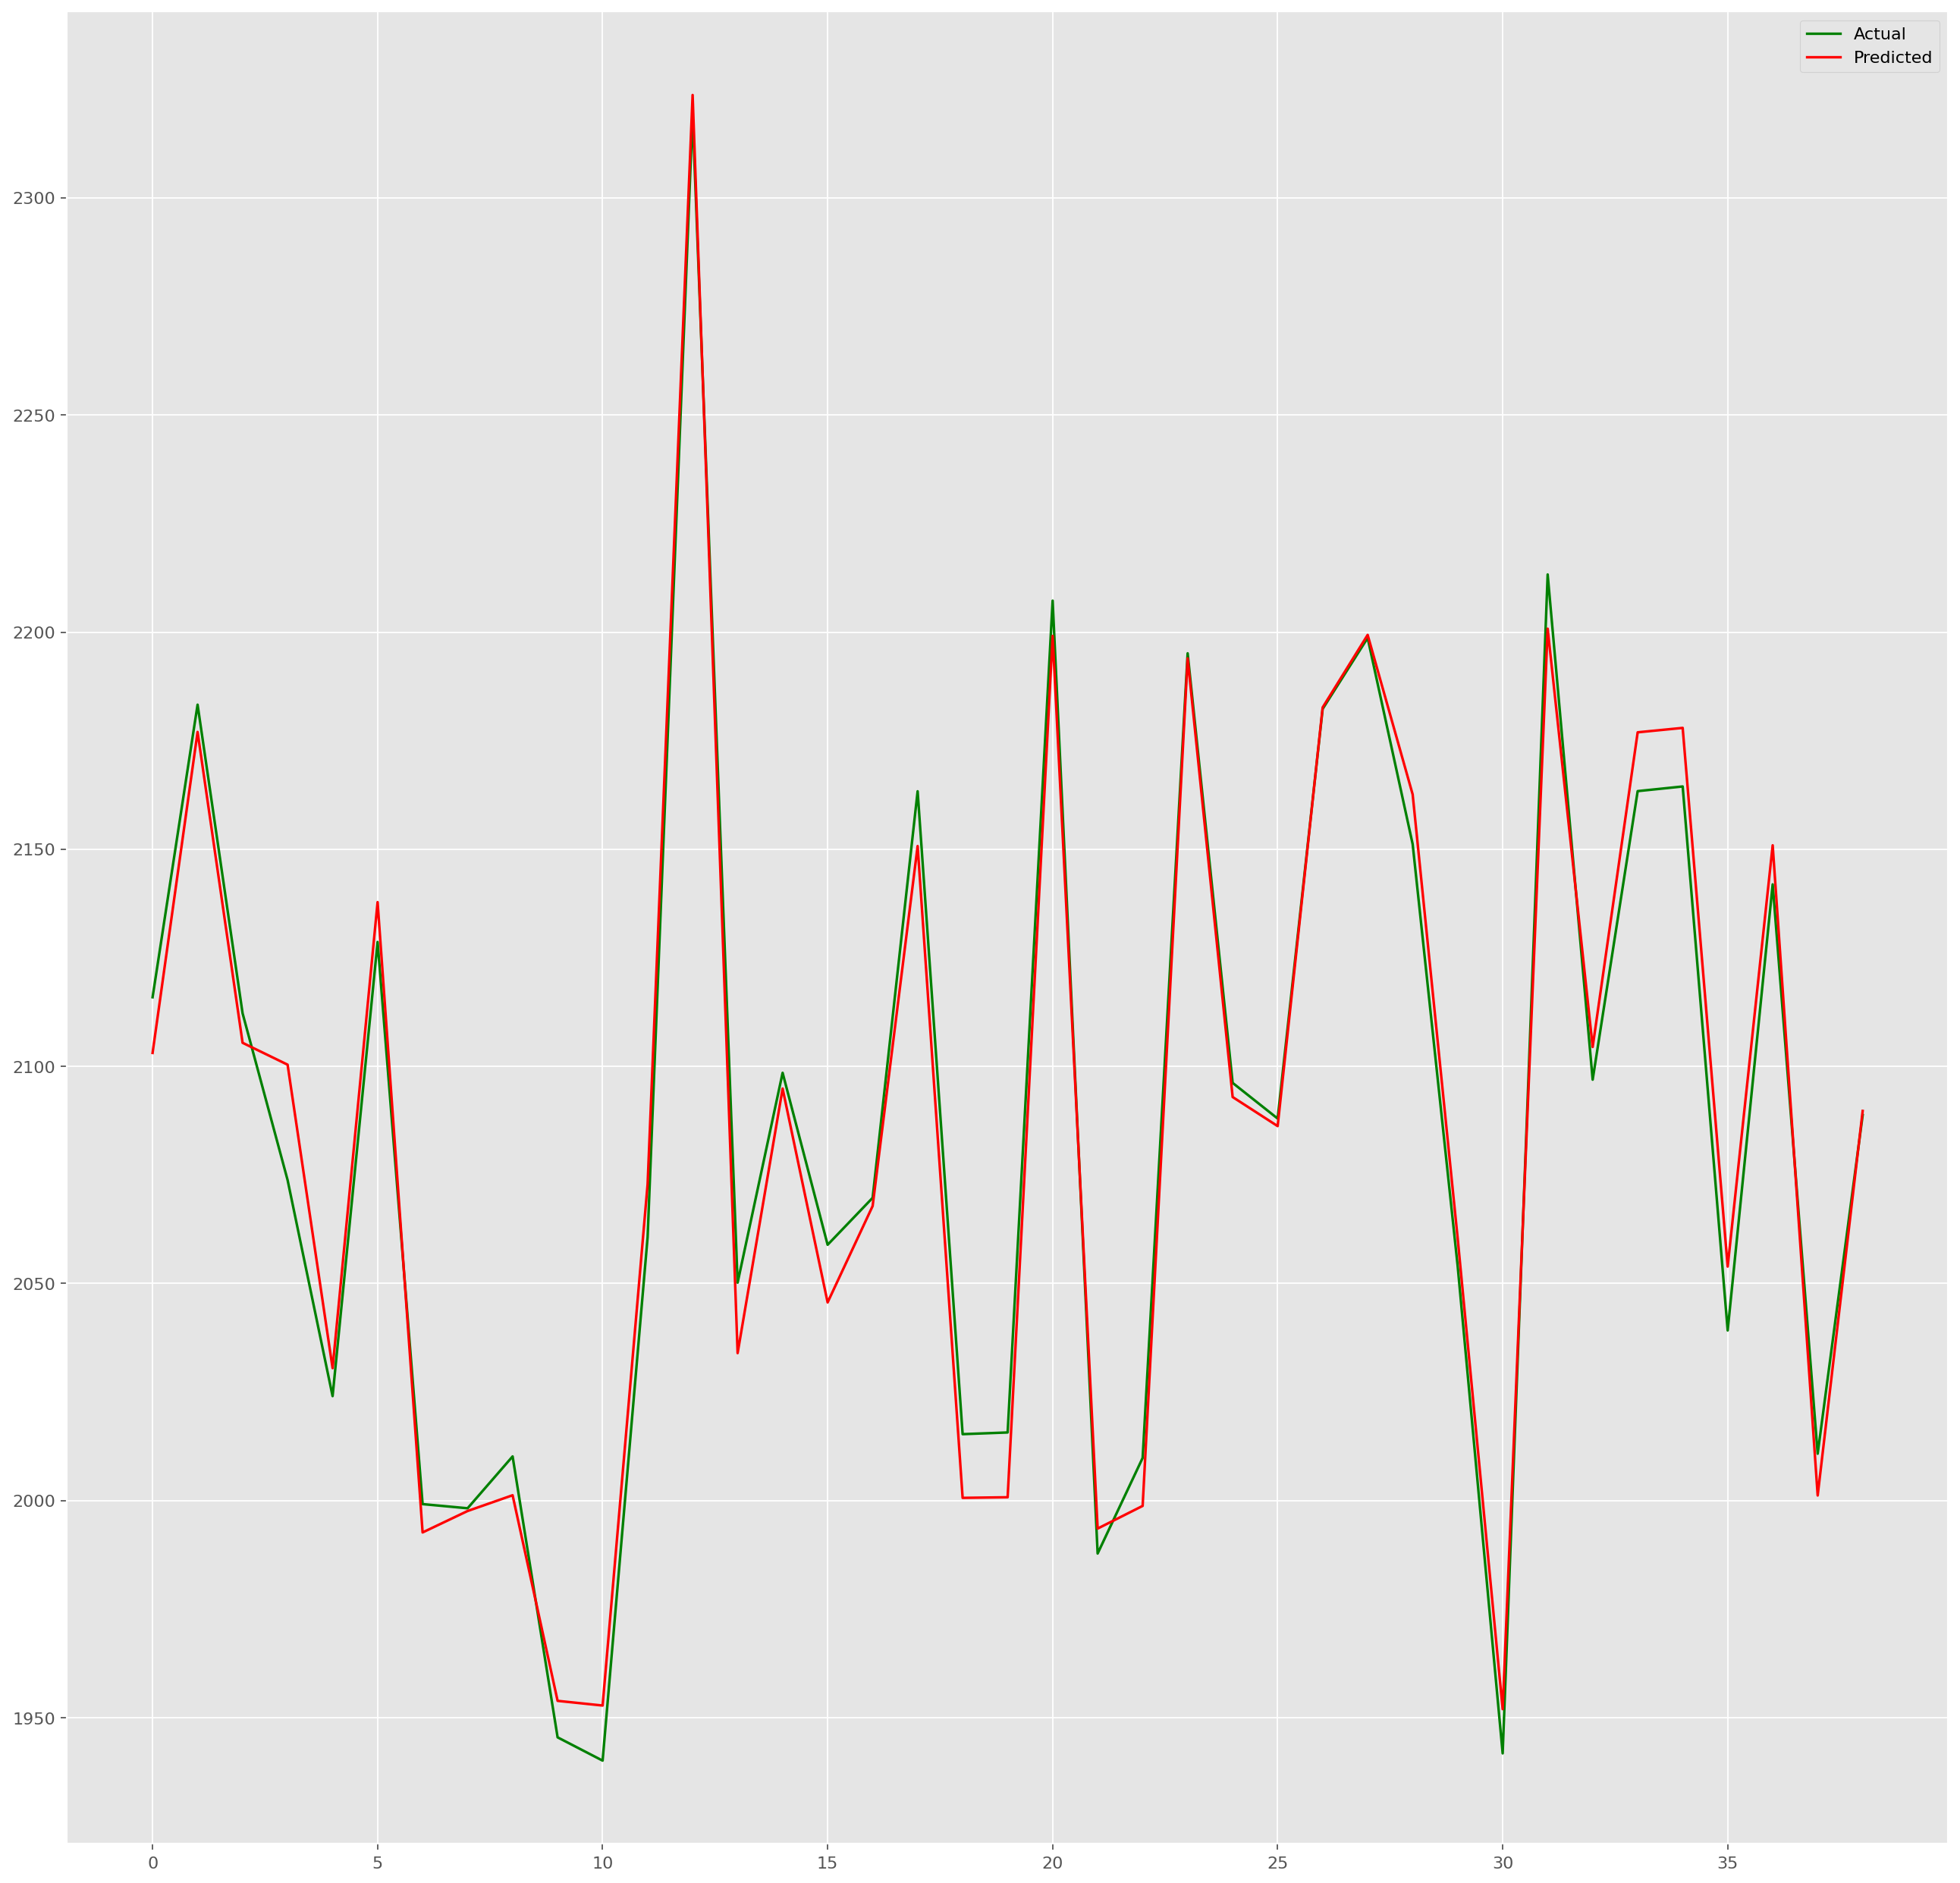

In [17]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(20, 20), dpi=160, facecolor='w', edgecolor='w')

plt.style.use('ggplot')
plt.plot(df['Actual'], 'g', label = 'Actual')
plt.plot(df['Predicted'], 'r', label = 'Predicted')

plt.legend()
plt.show()

In [18]:
import sklearn.metrics as metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predicted))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predicted))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predicted)))

Mean Absolute Error: 8.734292556106999
Mean Squared Error: 106.13178640956393
Root Mean Squared Error: 10.302028266781447
